In [1]:
import numpy as np
import pandas as pd

from scipy import ndimage

from matplotlib import pyplot as plt

In [16]:
def cardinal_distance_transform(img):
    PAD = 1
    pss = np.s_[PAD:-PAD,PAD:-PAD]
    pad = np.pad(img, PAD, constant_values=0)
    initd = np.full(pad.shape, max(pad.shape)+1, dtype=int)
    initd[~pad] = 0
    left = np.copy(initd)
    for j in range(1,pad.shape[1]):
        left[:, j] = np.minimum(left[:, j], left[:, j-1] + 1)
    right = np.copy(initd)
    for j in range(pad.shape[1]-2, -1, -1):
        right[:, j] = np.minimum(right[:, j], right[:, j+1] + 1)
    bottom = np.copy(initd)
    for j in range(1,pad.shape[0]):
        bottom[j] = np.minimum(bottom[j], bottom[j-1] + 1)
    top = np.copy(initd)
    for j in range(pad.shape[0]-2, -1, -1):
        top[j] = np.minimum(top[j], top[j+1] + 1)

    return top[pss], right[pss], bottom[pss], left[pss]

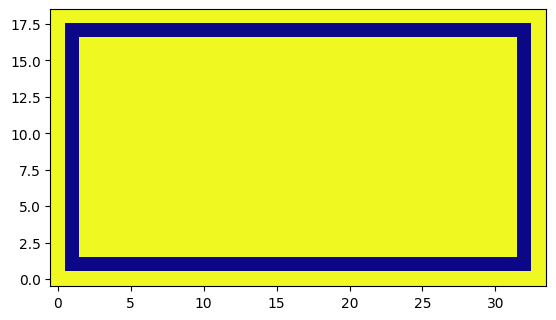

In [10]:
wall = np.ones((15,30), dtype=bool)
wall = np.pad(wall, 2)
wall[[0,-1]] = True
wall[:, [0,-1]] = True

plt.imshow(wall, origin='lower', cmap='plasma', vmin=0, vmax=1);

In [17]:
top, right, bottom, left = cardinal_distance_transform(wall)

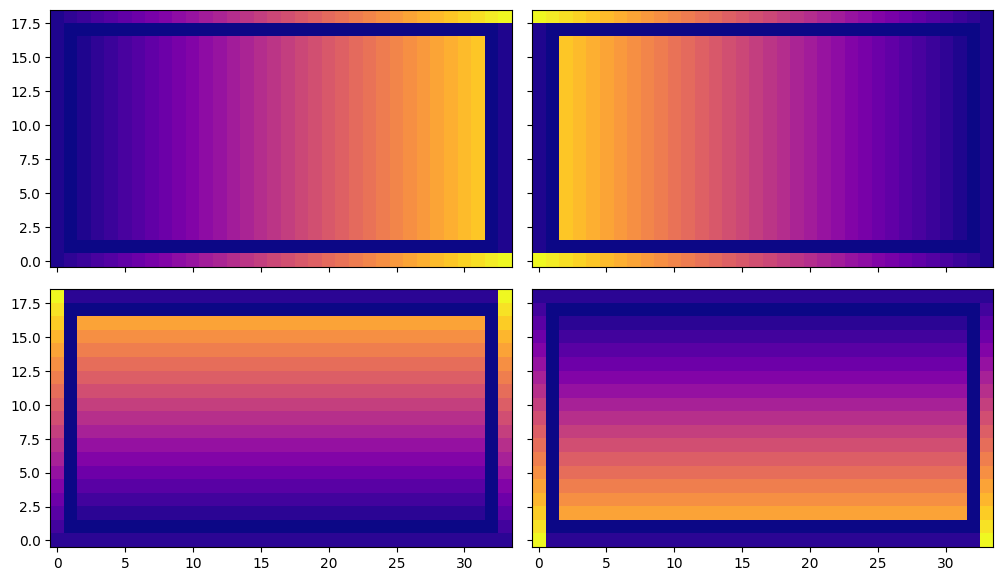

In [18]:
fs = 15
fig, ax = plt.subplots(2,2,sharex=True, sharey=True, figsize=(10,6))
ax = np.atleast_1d(ax).ravel()

for i,a in enumerate([left, right, bottom, top]):
    ax[i].imshow(a, origin='lower', cmap='plasma', vmin=0);
fig.tight_layout();

In [43]:
ivert[:,-1,0]

array([18,  0], dtype=int32)